In [ ]:
pip install pylatexenc

In [10]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="qiskit_ibm_provider")

In [1]:
# Import required libraries (compatible with your versions)
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.visualization import plot_histogram, circuit_drawer
import matplotlib.pyplot as plt
import numpy as np

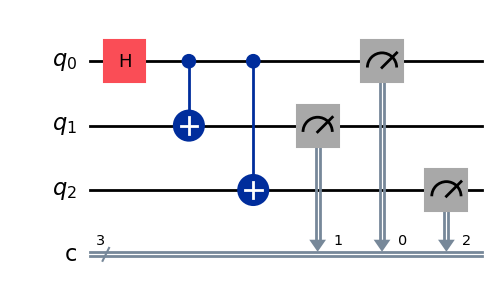

In [2]:
# --- Quantum Circuit ---
circuit = QuantumCircuit(3, 3)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(0, 2)
circuit.measure([0, 1, 2], [0, 1, 2])
circuit_drawer(circuit, output="mpl", style="iqp")

In [3]:
# --- Define noise model ---
noise = NoiseModel()

In [4]:
# 1-qubit and 2-qubit depolarizing errors
d1 = depolarizing_error(0.01, 1)
d2 = depolarizing_error(0.02, 2)


In [5]:
# Add noise to common gates
noise.add_all_qubit_quantum_error(d1, ['u3', 'h', 'x'])
noise.add_all_qubit_quantum_error(d2, ['cx'])


In [14]:
# --- Simulation with noise ---
backend = AerSimulator(noise_model=noise)
compiled_circuit = transpile(circuit, backend)
job = backend.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()


In [16]:
# --- Simple error mitigation (scaling example assuming 20% error) ---
mitigated_counts = {k: v * (1 - 0.2) for k, v in counts.items()}



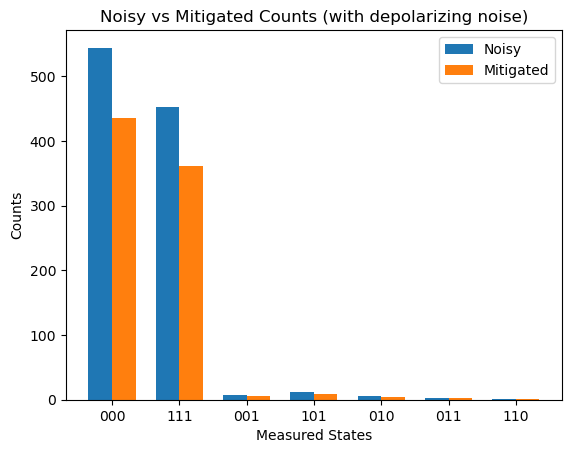

In [8]:
# --- Visualization ---
x = np.arange(len(counts))
width = 0.35

plt.bar(x - width/2, list(counts.values()), width, label='Noisy')
plt.bar(x + width/2, list(mitigated_counts.values()), width, label='Mitigated')
plt.xticks(x, list(counts.keys()))
plt.ylabel("Counts")
plt.xlabel("Measured States")
plt.title("Noisy vs Mitigated Counts (with depolarizing noise)")
plt.legend()
plt.show()